# Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from joblib import load

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

%matplotlib inline
import matplotlib.pyplot as plt

# Load in small test and train files

In [2]:
#Load in the test data to numpy array
#Although the text files are different, I'm using the same variable names as the original code to minimize debugging
X_train = np.loadtxt("X_train_p.txt", delimiter=",")
y_train = np.loadtxt("y_train_p.txt", delimiter=",")
X_test = np.loadtxt("X_test_p.txt", delimiter=",")
y_test = np.loadtxt("y_test_p.txt", delimiter=",")

# ANN Classifiers

### 2-Layer ANN: No hidden layer

In [3]:
model1 = keras.Sequential([
    keras.layers.Dense(20, input_shape=(32,),activation= 'sigmoid')
])
model1.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model1.fit(X_train, y_train, epochs=5)

Epoch 1/5
3527/3527 [==============================] - 3s 629us/step - loss: 1.2031 - accuracy: 0.6701
Epoch 2/5
3527/3527 [==============================] - 2s 618us/step - loss: 0.7872 - accuracy: 0.7575
Epoch 3/5
3527/3527 [==============================] - 2s 602us/step - loss: 0.7397 - accuracy: 0.7639
Epoch 4/5
3527/3527 [==============================] - 2s 601us/step - loss: 0.7204 - accuracy: 0.7667
Epoch 5/5
3527/3527 [==============================] - 2s 634us/step - loss: 0.7099 - accuracy: 0.7702


In [4]:
model1.evaluate(X_test, y_test)

36/36 [==============================] - 0s 852us/step - loss: 0.7144 - accuracy: 0.7781


[0.7144404053688049, 0.7780701518058777]

In [9]:
# y_predicted for the First Model (With only two layers)
y_predicted1 = model1.predict(X_test)
y_predicted_labels1 = [np.argmax(i) for i in y_predicted1]
print("Classification Report for 3 Layes Network: \n", classification_report(y_test, y_predicted_labels1))

Classification Report for 3 Layes Network: 
               precision    recall  f1-score   support

         1.0       0.98      1.00      0.99        53
         2.0       0.53      0.57      0.55        56
         3.0       1.00      1.00      1.00        49
         4.0       1.00      1.00      1.00        63
         5.0       0.76      0.94      0.84        54
         6.0       0.72      0.80      0.76        55
         7.0       0.73      0.71      0.72        62
         8.0       0.69      0.55      0.61        64
         9.0       0.69      0.54      0.61        61
        10.0       0.62      0.78      0.69        46
        11.0       0.61      0.43      0.50        54
        12.0       0.62      0.67      0.65        64
        13.0       0.86      0.90      0.88        70
        14.0       0.97      0.99      0.98        69
        15.0       0.88      1.00      0.94        65
        16.0       0.97      1.00      0.99        76
        17.0       0.98      0.89   

Text(131.28000000000003, 0.5, 'Thruth')

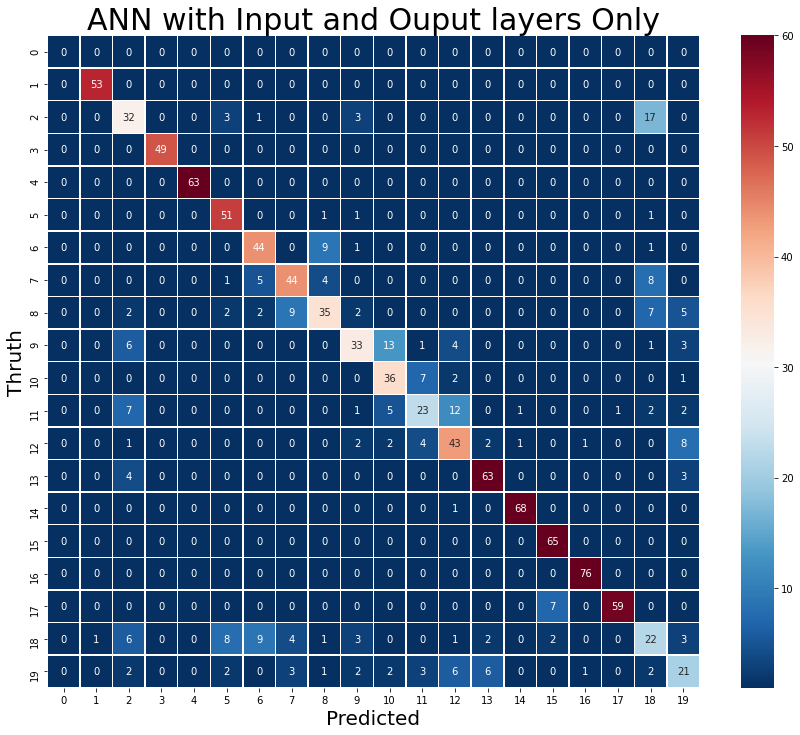

In [10]:
cm1 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels1)
import seaborn as sn
plt.figure(figsize = (15,12))
b = sn.heatmap(cm1, annot=True, fmt='d', linewidths=.5, square=True, cmap='RdBu_r', vmin=1 , vmax=60)
b.axes.set_title("ANN with Input and Ouput layers Only",fontsize=30)
b.set_xlabel("Predicted",fontsize=20)
b.set_ylabel("Thruth",fontsize=20)

### 3-Layer ANN: 1 hidden layer

In [11]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(32,),activation= 'relu'),
    keras.layers.Dense(20,activation= 'sigmoid')
])
model2.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(X_train, y_train, epochs=5)

Epoch 1/5
3527/3527 [==============================] - 3s 649us/step - loss: 0.3930 - accuracy: 0.8893
Epoch 2/5
3527/3527 [==============================] - 2s 632us/step - loss: 0.1100 - accuracy: 0.9673
Epoch 3/5
3527/3527 [==============================] - 2s 637us/step - loss: 0.0788 - accuracy: 0.9758
Epoch 4/5
3527/3527 [==============================] - 2s 644us/step - loss: 0.0646 - accuracy: 0.9803
Epoch 5/5
3527/3527 [==============================] - 2s 641us/step - loss: 0.0561 - accuracy: 0.9825


In [12]:
r"""Printing the Accuracy and the losss values"""
model2.evaluate(X_test, y_test)

36/36 [==============================] - 0s 679us/step - loss: 0.0499 - accuracy: 0.9868


[0.049877315759658813, 0.9868420958518982]

In [14]:
# y_predicted for teh second Model (With a hidden layer)
y_predicted2 = model2.predict(X_test)
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]
print("Classification Report for 3 Layes Network: \n", classification_report(y_test, y_predicted_labels2))

Classification Report for 3 Layes Network: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        53
         2.0       1.00      1.00      1.00        56
         3.0       1.00      1.00      1.00        49
         4.0       1.00      1.00      1.00        63
         5.0       1.00      0.96      0.98        54
         6.0       0.96      1.00      0.98        55
         7.0       0.95      0.98      0.97        62
         8.0       0.98      0.91      0.94        64
         9.0       0.97      1.00      0.98        61
        10.0       0.98      1.00      0.99        46
        11.0       0.98      0.98      0.98        54
        12.0       1.00      1.00      1.00        64
        13.0       1.00      0.99      0.99        70
        14.0       1.00      1.00      1.00        69
        15.0       1.00      1.00      1.00        65
        16.0       1.00      1.00      1.00        76
        17.0       1.00      1.00   

Text(131.28000000000003, 0.5, 'Thruth')

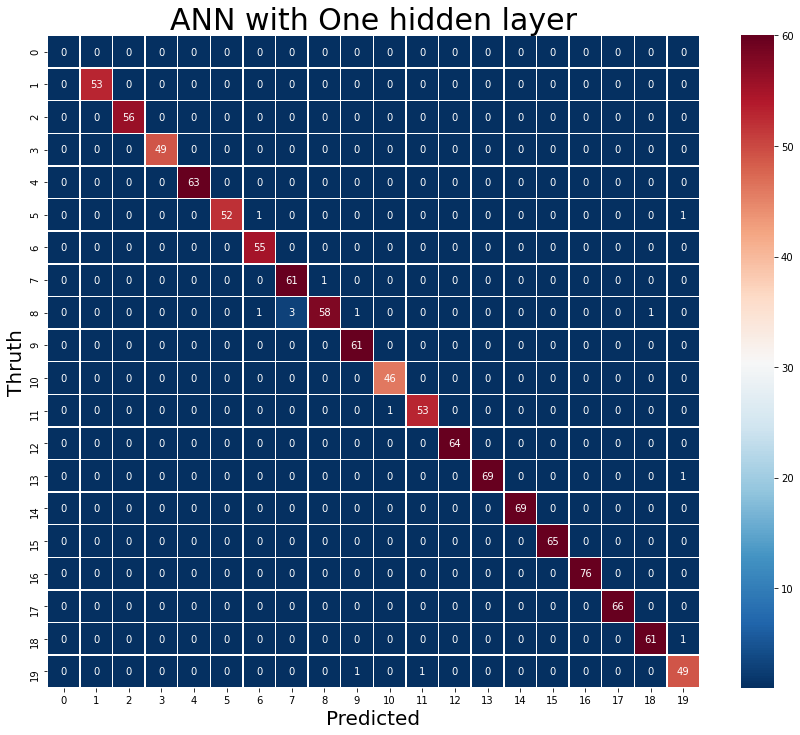

In [15]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels2)
plt.figure(figsize = (15,12))
b = sn.heatmap(cm2, annot=True, fmt='d', linewidths=.5, square=True, cmap='RdBu_r', vmin=1 , vmax=60)
b.axes.set_title('ANN with One hidden layer',fontsize=30)
b.set_xlabel('Predicted',fontsize=20)
b.set_ylabel('Thruth',fontsize=20)

### 4-Layer ANN: 2 hidden layers

In [16]:
model3 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(32,),activation= 'relu'),
    keras.layers.Dense(100,activation= 'relu'),
    keras.layers.Dense(20,activation= 'sigmoid')
])
model3.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model3.fit(X_train, y_train, epochs=5)

Epoch 1/5
3527/3527 [==============================] - 3s 747us/step - loss: 0.2674 - accuracy: 0.9189
Epoch 2/5
3527/3527 [==============================] - 3s 717us/step - loss: 0.0856 - accuracy: 0.9721
Epoch 3/5
3527/3527 [==============================] - 3s 712us/step - loss: 0.0649 - accuracy: 0.9781
Epoch 4/5
3527/3527 [==============================] - 3s 722us/step - loss: 0.0541 - accuracy: 0.9814
Epoch 5/5
3527/3527 [==============================] - 3s 728us/step - loss: 0.0470 - accuracy: 0.9837


In [ ]:
model3.evaluate(X_test, y_test)

In [17]:
# y_predicted for the third Model (With Two hidden layers)
y_predicted3 = model3.predict(X_test)
y_predicted_labels3 = [np.argmax(i) for i in y_predicted3]
print("ANN Class Report for 2 Hidden Layers: \n", classification_report(y_test, y_predicted_labels3))

ANN Class Report for 2 Hidden Layers: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        53
         2.0       1.00      1.00      1.00        56
         3.0       1.00      1.00      1.00        49
         4.0       1.00      1.00      1.00        63
         5.0       0.90      0.98      0.94        54
         6.0       0.98      0.87      0.92        55
         7.0       0.97      0.98      0.98        62
         8.0       0.95      0.92      0.94        64
         9.0       0.98      1.00      0.99        61
        10.0       0.96      1.00      0.98        46
        11.0       0.93      0.98      0.95        54
        12.0       1.00      0.98      0.99        64
        13.0       1.00      1.00      1.00        70
        14.0       0.97      1.00      0.99        69
        15.0       1.00      1.00      1.00        65
        16.0       1.00      1.00      1.00        76
        17.0       1.00      0.95      0.

Text(131.28000000000003, 0.5, 'Thruth')

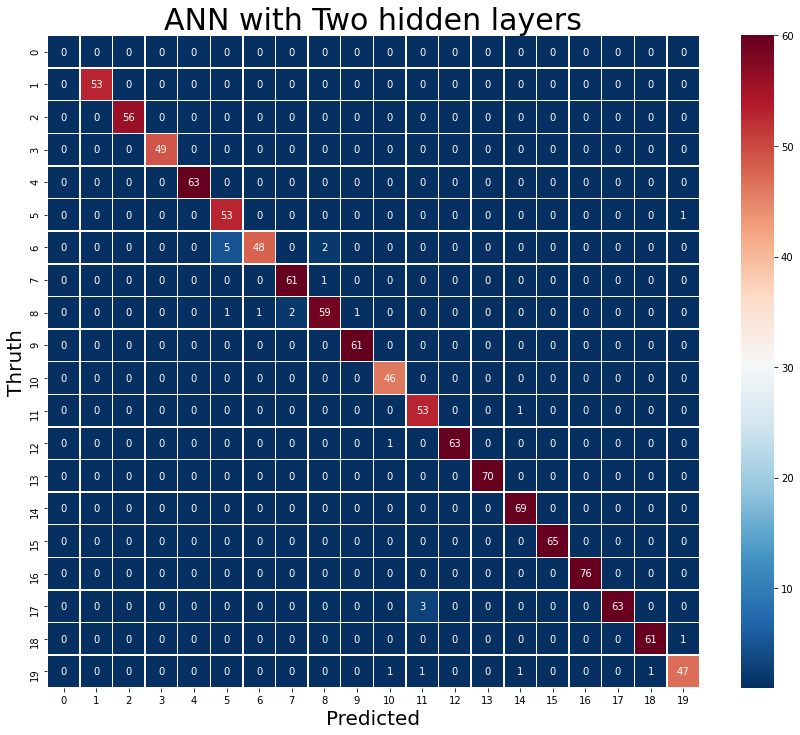

In [18]:
cm3 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels3)
plt.figure(figsize = (15,12))
b = sn.heatmap(cm3, annot=True, fmt='d', linewidths=.5, square=True, cmap='RdBu_r', vmin=1 , vmax=60)
b.axes.set_title('ANN with Two hidden layers',fontsize=30)
b.set_xlabel('Predicted',fontsize=20)
b.set_ylabel('Thruth',fontsize=20)

# Random Forest Classifier

estimator qty 10 score: 0.962280701754386
              precision    recall  f1-score   support

         a01       1.00      1.00      1.00        53
         a02       1.00      1.00      1.00        56
         a03       1.00      1.00      1.00        49
         a04       1.00      1.00      1.00        63
         a05       0.95      0.96      0.95        54
         a06       0.87      0.96      0.91        55
         a07       0.97      1.00      0.98        62
         a08       0.93      0.80      0.86        64
         a09       0.94      0.98      0.96        61
         a10       0.87      1.00      0.93        46
         a11       0.94      0.94      0.94        54
         a12       0.95      0.98      0.97        64
         a13       0.99      1.00      0.99        70
         a14       1.00      0.99      0.99        69
         a15       1.00      1.00      1.00        65
         a16       1.00      1.00      1.00        76
         a17       1.00      1.00      

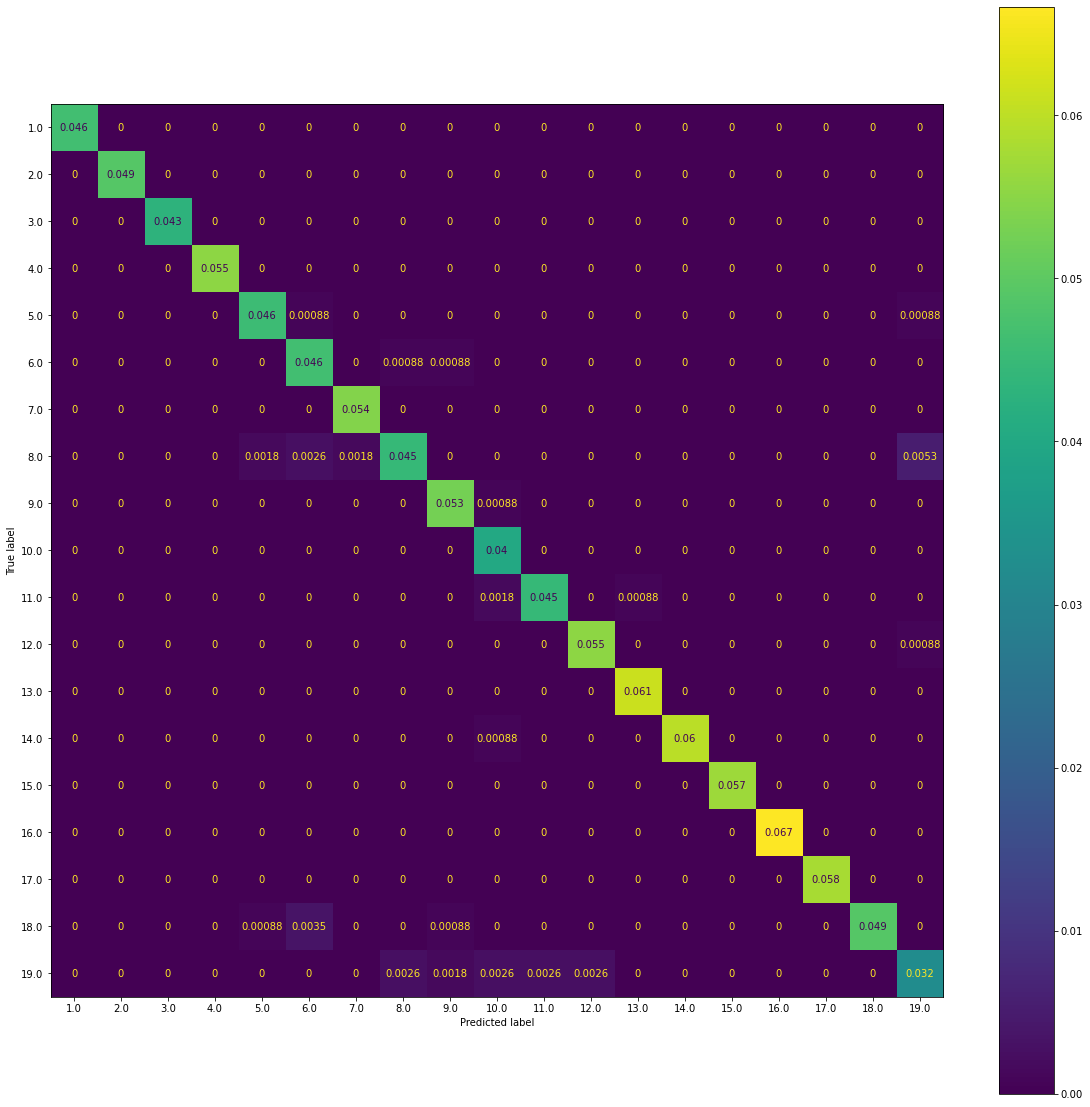

In [19]:
#Train the RF model
clfRF = RandomForestClassifier(n_estimators = 10)
clfRF.fit(X_train, y_train)
y_pred = clfRF.predict(X_test)
RFscore = clfRF.score(X_test, y_test)
print("estimator qty 10 score:", RFscore)

#Generate the classification report
target_names = ['a01', 'a02','a03','a04','a05','a06','a07','a08','a09','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19']
print(classification_report(y_test, y_pred, target_names=target_names))

#Generate the confusion matrix
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(clfRF, X_test, y_test, normalize = "all", ax = ax)